## Exploring and preparing the data set

##### Predictive modeling of customer bookings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from os import system
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df['booking_complete'].unique()


array([0, 1], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [10]:
df['flight_day'] = df['flight_day'].astype(int) # changing flight day to int


In [11]:
df.shape

(50000, 14)

In [12]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.59,1.02,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.94,90.45,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.04,33.89,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.07,5.41,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.81,1.99,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.67,0.47,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.30,0.46,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.43,0.49,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.28,1.50,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.15,0.36,0.00,0.00,0.00,0.00,1.0


### Visualization

In [13]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [14]:
df['booking_complete'].value_counts(normalize = True)

booking_complete
0    0.85044
1    0.14956
Name: proportion, dtype: float64

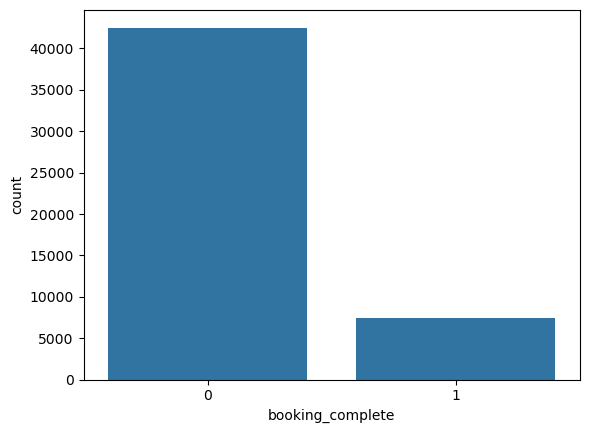

In [15]:
sns.countplot(data=df,x='booking_complete');

<Axes: xlabel='sales_channel', ylabel='count'>

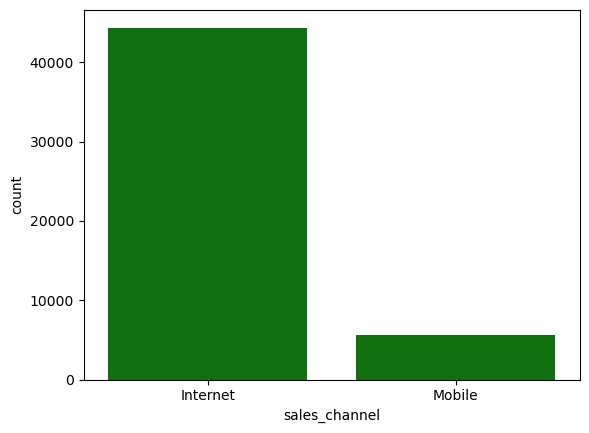

In [16]:
sns.countplot(data=df,x='sales_channel', color = 'green')

<Axes: xlabel='flight_day', ylabel='count'>

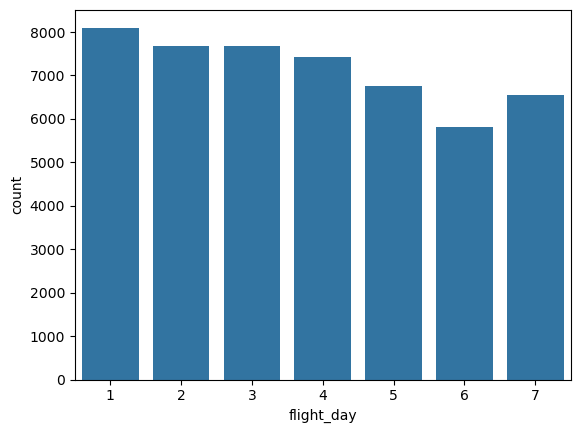

In [17]:
sns.countplot(data=df, x='flight_day')

In [18]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


### Feature Engineering

In [19]:
X = pd.get_dummies(df.drop('booking_complete',axis=1),drop_first=True)

In [20]:
y = df['booking_complete']

In [21]:
y.shape

(50000,)

#### Building the Predictive Model

In [22]:
y = y.values.reshape(-1,1)

In [23]:
y.shape

(50000, 1)

In [24]:
X.shape

(50000, 913)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [27]:
# Define hyperparameter space
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

In [28]:
# Initialize random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize random search
rfs = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,
                                   cv=5, n_iter=10, random_state=42)


In [29]:

rfs.fit(X_train, y_train)
rfs

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

In [30]:
best_model = rfs.best_estimator_

In [31]:
print('The Training data Score is:',best_model.score(X_train, y_train))
print('The Test data Score is:',best_model.score(X_test,y_test))

The Training data Score is: 0.85005
The Test data Score is: 0.852


Upsampling the data becuase the target data is imbalanced 

In [32]:
# separate minority and majority class
from sklearn.utils import resample

mj= df[df.booking_complete==0]
mn= df[df.booking_complete==1]


mj_upsampled = resample(mn,
                        replace=True,
                        n_samples=len(mj),
                        random_state = 42)



In [33]:
mj_upsampled = mj_upsampled.reset_index(drop=True)
mj_upsampled.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,6,Internet,RoundTrip,119,6,11,6,OOLPEN,Malaysia,1,1,1,8.83,1
1,2,Internet,RoundTrip,60,196,8,1,COKPER,Australia,1,0,1,5.62,1
2,2,Internet,RoundTrip,109,5,3,1,KBVXIY,China,0,0,0,5.00,1
3,2,Internet,RoundTrip,46,5,13,1,ICNLGK,South Korea,0,0,0,6.62,1
4,1,Internet,RoundTrip,70,5,0,3,ICNJHB,Malaysia,1,1,1,6.62,1


In [34]:
frame = [df,mj_upsampled]
df = pd.concat(frame, axis = 0)

In [35]:
df['booking_complete'].value_counts()


booking_complete
1    50000
0    42522
Name: count, dtype: int64

In [36]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [37]:
X = pd.get_dummies(df.drop('booking_complete',axis=1),drop_first=True)

In [38]:
y = df['booking_complete']
y = y.values.reshape(-1,1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Scale data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define hyperparameter space

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Initialize random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize random search
rfs = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,
                         cv=5, n_iter=10, random_state=42)

rfs.fit(X_train, y_train)
rfs


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

The Training data Score is: 0.9990948025453612
The Test data Score is: 0.9596865711969738


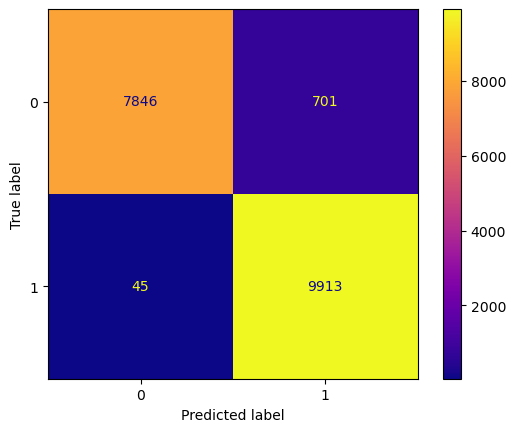

In [40]:
best_model2 = rfs.best_estimator_

print('The Training data Score is:',best_model2.score(X_train, y_train))
print('The Test data Score is:',best_model2.score(X_test,y_test))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model2,X_test,y_test,cmap='plasma')

In [41]:
# Get feature importance values
feature_importances = best_model2.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame with feature names and importance values
feature_importance_df = pd.DataFrame({
    "Feature Name": feature_names,
    "Importance": feature_importances
})

In [42]:
# Print the DataFrame
feature_importance_df.head()

,Feature Name,Importance
0,num_passengers,0.041032
1,purchase_lead,0.137822
2,length_of_stay,0.109894
3,flight_hour,0.106725
4,flight_day,0.074734


In [43]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


In [44]:
feature_importance_df.head()

,Feature Name,Importance
1,purchase_lead,0.137822
2,length_of_stay,0.109894
3,flight_hour,0.106725
4,flight_day,0.074734
8,flight_duration,0.042561


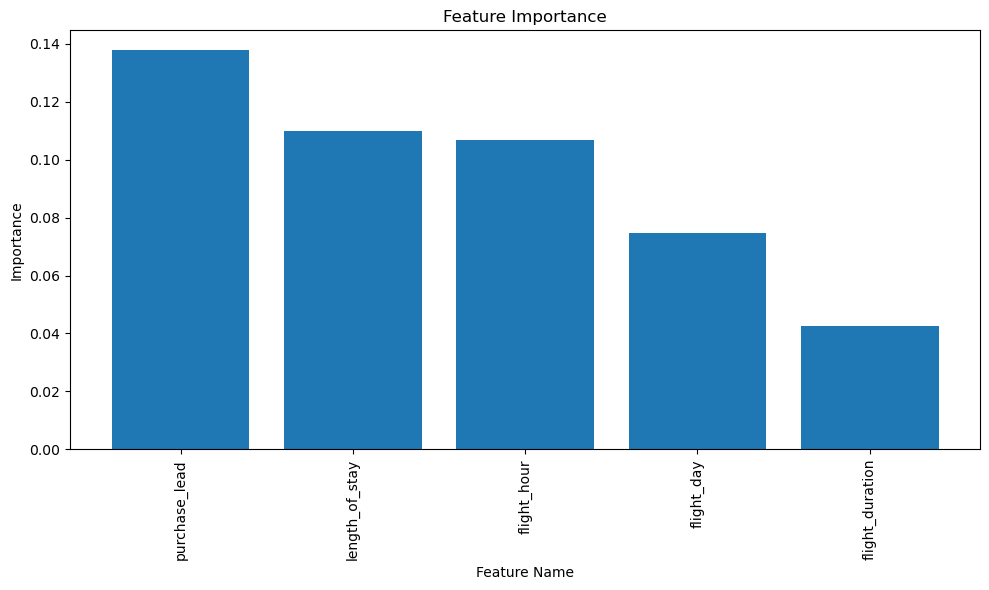

In [45]:
# Plot a multiple color bar
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature Name"].head(), feature_importance_df["Importance"].head(), color=plt.cm.tab20(np.linspace(0, 1, len(feature_importance_df))))
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Perfroming Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
# Cross-validation accuracy
accuracy_scores = cross_val_score(best_model2, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", accuracy_scores.mean())

Cross-validation accuracy: 0.8263862695643306


In [48]:
# Cross-validation precision
precision_scores = cross_val_score(best_model2, X, y, cv=5, scoring='precision')
print("Cross-validation precision:", precision_scores.mean())

Cross-validation precision: 0.7610082718415305


In [49]:
# Cross-validation recall
recall_scores = cross_val_score(best_model2, X, y, cv=5, scoring='recall')
print("Cross-validation recall:", recall_scores.mean())

Cross-validation recall: 0.9982200000000001


In [50]:
# Cross-validation F1-score
f1_scores = cross_val_score(best_model2, X, y, cv=5, scoring='f1')
print("Cross-validation F1-score:", f1_scores.mean())

Cross-validation F1-score: 0.862652113981043


In [51]:
# Cross-validation ROC-AUC
roc_auc_scores = cross_val_score(best_model2, X, y, cv=5, scoring='roc_auc')
print("Cross-validation ROC-AUC:", roc_auc_scores.mean())

Cross-validation ROC-AUC: 0.967886750503688


In [52]:
# Cross-validation metrics
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [53]:
# Initialize lists to store the results
mean_scores = []

In [54]:
# Perform cross-validation for each metric
for metric in metrics:
    scores = cross_val_score(best_model2, X, y, cv=5, scoring=metric)
    mean_scores.append(scores.mean())


In [55]:
# Create a DataFrame with the results
cv_results_df = pd.DataFrame({
    "Metric": metrics,
    "Mean Score": mean_scores
})


In [56]:
cv_results_df

,Metric,Mean Score
0,accuracy,0.826386
1,precision,0.761008
2,recall,0.998220
3,f1,0.862652
4,roc_auc,0.967887


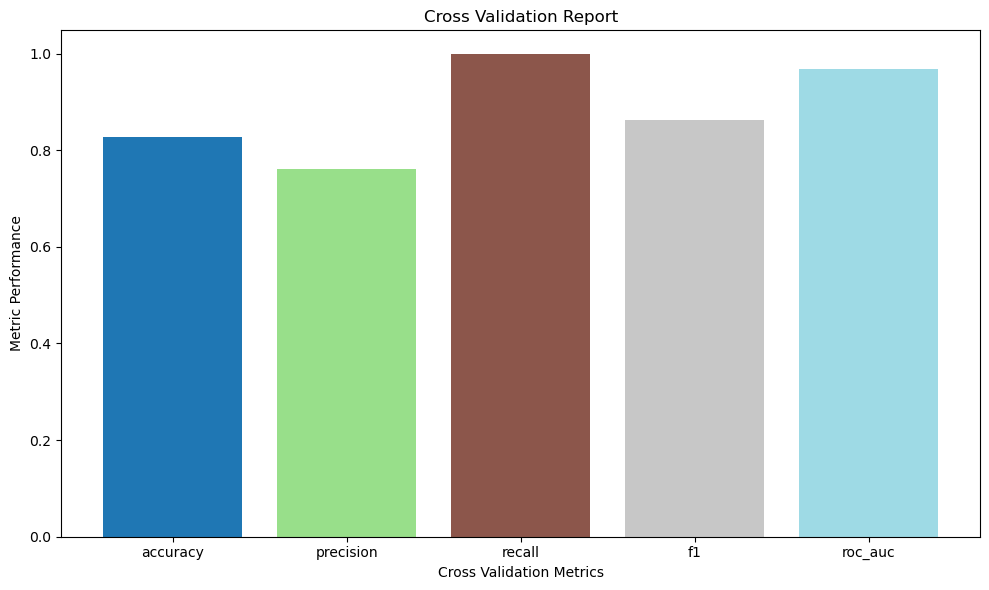

In [57]:
# Plot a multiple color bar
plt.figure(figsize=(10, 6))
plt.bar(cv_results_df["Metric"], cv_results_df["Mean Score"], color=plt.cm.tab20(np.linspace(0, 1, len(cv_results_df))))
plt.xlabel("Cross Validation Metrics")
plt.ylabel("Metric Performance")
plt.title("Cross Validation Report")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()